강의_6기_AI응용_4차시_01_특징자와 매칭.ipynb

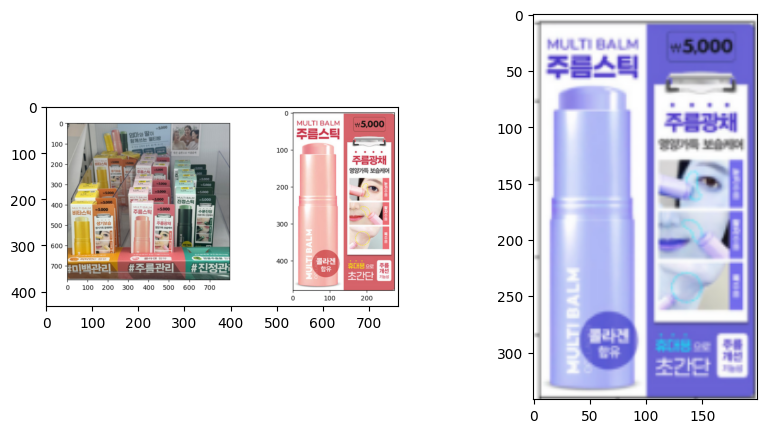

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path = 'beau_3.png'
target_path = 'new_target.png'

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.imread(image_path))
axes[1].imshow(cv2.imread(target_path))
plt.show()

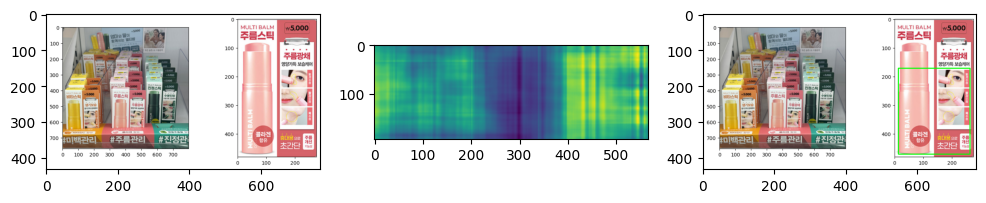

In [4]:
#1.그레이스케일로 변환
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

target = cv2.imread(target_path)
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
target_gray = cv2.resize(target_gray, (200,240)) #타겟의 회전, 크기 변화, 밝기 변화 가 영향을 많이 미침
# resize : 템플릿 크기조정 -> 템플릿 매칭의 필수조건

#2.템플릿의 너비와 높이를 찾음
w, h = target_gray.shape[::-1] # h w -> w h

#3.템플릿을 이미지에서 매칭해서 찾아봐!
#매칭 옵션 : SQDIFF(픽셀 제곱차이), CCORR(픽셀 곱의 합), CCOEFF(코사인유사도, 상관관계)  X NORMED(일정한 범위 내로 만듦)
result = cv2.matchTemplate(image_gray, target_gray, cv2.TM_CCOEFF_NORMED)
# SQDIFF 작을수록 <> CCORR, CCOEFF가 클수록 

#매칭 결과에서 최소값, 최대값, 최소값 위치, 최대값 위치를 찾으려고 함
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
# 가장 유사도 낮은 값, 가장 유사도 높은 값, 가장 유사도 낮은 값의 위치, 가장 유사도 높은 값의 위치

#시각화
top_left = max_loc #가능성이 높은 지역의 왼쪽 위 모서리
#top_left = (x, y)형태라서 top_left[0]는 x좌표, top_left[1]는 y좌표
bottom_right = (top_left[0]+w, top_left[1]+h) #왼쪽 위 모서리를 기준으로 +너비, +높이해서 구한 오른쪽 아래 모서리

matched = image.copy()
cv2.rectangle(matched, top_left, bottom_right, (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image)
axes[1].imshow(result)
axes[2].imshow(matched)
plt.show()

In [ ]:
target_gray.shape # h w

(240, 200)